In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision

In [2]:
# Model parameters
img_width = 28
img_channels = 1
latent_dim = 64
d_channels = [img_width * img_width * img_channels, 512, 256, 128, 32, 1]
g_channels = [latent_dim, 128, 256, 512, img_width * img_width * img_channels]

# Training hyperparameters
batch_size = 64
lr = 0.002
num_epochs = 50

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# Load data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Scale to [-1, 1]
])
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=False)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [5]:
class Discriminator(nn.Module):
    def __init__(self, d_channels):
        super(Discriminator, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(d_channels)-1):
            self.layers.append(
                nn.Sequential(
                    nn.Linear(d_channels[i], d_channels[i+1]),
                    nn.LayerNorm(d_channels[i+1]) if i != len(d_channels)-2 else nn.Identity(),
                    nn.LeakyReLU() if i != len(d_channels)-2 else nn.Identity(),
                )
            )
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [6]:
class Generator(nn.Module):
    def __init__(self, g_channels, img_width, img_channels):
        super(Generator, self).__init__()
        self.layers = nn.ModuleList()
        self.img_width = img_width
        self.img_channels = img_channels
        for i in range(len(g_channels)-1):
            self.layers.append(
                nn.Sequential(
                    nn.Linear(g_channels[i], g_channels[i+1]),
                    nn.BatchNorm1d(g_channels[i+1]) if i != len(g_channels)-2 else nn.Identity(),
                    nn.ReLU() if i != len(g_channels)-2 else nn.Tanh()
                )
            )
    def forward(self, x):
        batch_size = x.shape[0]
        out = x
        for layer in self.layers:
            out = layer(out)
        return out

In [7]:
# Model initialisation
disc = Discriminator(d_channels).to(device)
gen = Generator(g_channels, img_width, img_channels).to(device)

d_optimiser = torch.optim.Adam(disc.parameters(), lr=lr)
g_optimiser = torch.optim.Adam(gen.parameters(), lr=lr)

criterion = nn.BCEWithLogitsLoss()

Epoch [0/50] Batch 0/938 Loss D: 0.1854, Loss G: 4.9047
Epoch [0/50] Batch 100/938 Loss D: 0.0923, Loss G: 5.5234
Epoch [0/50] Batch 200/938 Loss D: 0.0183, Loss G: 7.0065
Epoch [0/50] Batch 300/938 Loss D: 0.0066, Loss G: 8.1232
Epoch [0/50] Batch 400/938 Loss D: 0.0016, Loss G: 8.5473
Epoch [0/50] Batch 500/938 Loss D: 0.0194, Loss G: 5.8783
Epoch [0/50] Batch 600/938 Loss D: 0.0062, Loss G: 7.5204
Epoch [0/50] Batch 700/938 Loss D: 0.0011, Loss G: 8.3322
Epoch [0/50] Batch 800/938 Loss D: 0.0008, Loss G: 8.5148
Epoch [0/50] Batch 900/938 Loss D: 0.0019, Loss G: 8.2478


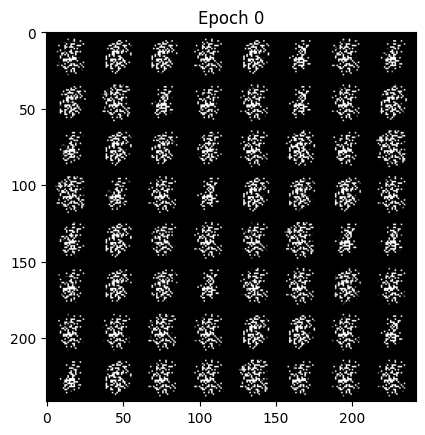

Epoch [1/50] Batch 0/938 Loss D: 0.0008, Loss G: 8.9132
Epoch [1/50] Batch 100/938 Loss D: 0.0005, Loss G: 9.2483
Epoch [1/50] Batch 200/938 Loss D: 0.0004, Loss G: 9.3539
Epoch [1/50] Batch 300/938 Loss D: 0.0003, Loss G: 9.4026
Epoch [1/50] Batch 400/938 Loss D: 0.0070, Loss G: 5.2196
Epoch [1/50] Batch 500/938 Loss D: 0.0012, Loss G: 7.4471
Epoch [1/50] Batch 600/938 Loss D: 0.0005, Loss G: 8.7129
Epoch [1/50] Batch 700/938 Loss D: 0.0005, Loss G: 8.5905
Epoch [1/50] Batch 800/938 Loss D: 0.0006, Loss G: 8.5319
Epoch [1/50] Batch 900/938 Loss D: 0.0005, Loss G: 8.7480


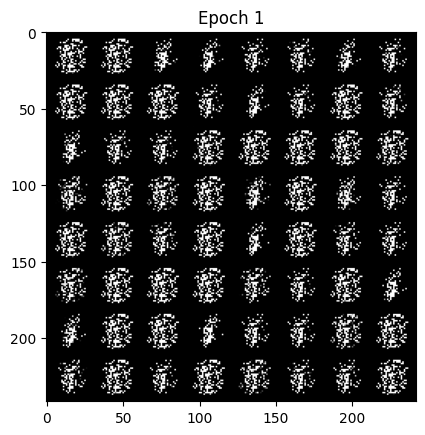

Epoch [2/50] Batch 0/938 Loss D: 0.0004, Loss G: 8.7786
Epoch [2/50] Batch 100/938 Loss D: 0.0004, Loss G: 8.5427
Epoch [2/50] Batch 200/938 Loss D: 0.0028, Loss G: 7.2707
Epoch [2/50] Batch 300/938 Loss D: 0.0003, Loss G: 8.9015
Epoch [2/50] Batch 400/938 Loss D: 0.0003, Loss G: 8.9240
Epoch [2/50] Batch 500/938 Loss D: 0.0007, Loss G: 8.6599
Epoch [2/50] Batch 600/938 Loss D: 0.0002, Loss G: 9.1049
Epoch [2/50] Batch 700/938 Loss D: 0.0014, Loss G: 7.8009
Epoch [2/50] Batch 800/938 Loss D: 0.0065, Loss G: 7.5382
Epoch [2/50] Batch 900/938 Loss D: 0.0006, Loss G: 8.7065


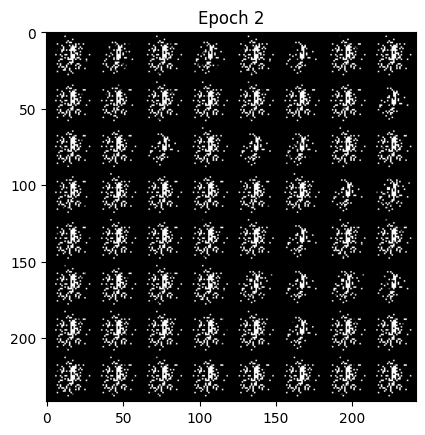

Epoch [3/50] Batch 0/938 Loss D: 0.0006, Loss G: 9.1047
Epoch [3/50] Batch 100/938 Loss D: 0.0003, Loss G: 8.9096
Epoch [3/50] Batch 200/938 Loss D: 0.0054, Loss G: 6.6013
Epoch [3/50] Batch 300/938 Loss D: 0.0010, Loss G: 6.9915
Epoch [3/50] Batch 400/938 Loss D: 0.0005, Loss G: 8.1484
Epoch [3/50] Batch 500/938 Loss D: 0.0053, Loss G: 7.4062
Epoch [3/50] Batch 600/938 Loss D: 0.0006, Loss G: 7.7214
Epoch [3/50] Batch 700/938 Loss D: 0.0376, Loss G: 7.4725
Epoch [3/50] Batch 800/938 Loss D: 0.0314, Loss G: 8.6018
Epoch [3/50] Batch 900/938 Loss D: 0.0009, Loss G: 8.5658


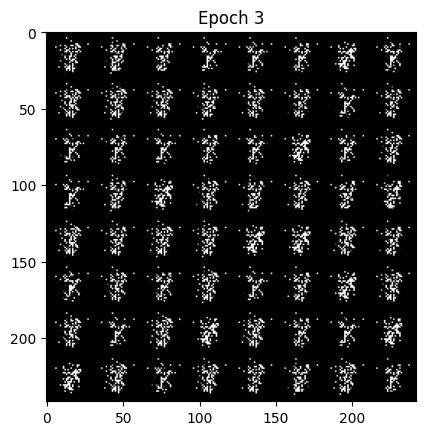

Epoch [4/50] Batch 0/938 Loss D: 0.0005, Loss G: 8.6670
Epoch [4/50] Batch 100/938 Loss D: 0.0341, Loss G: 6.3502
Epoch [4/50] Batch 200/938 Loss D: 0.0011, Loss G: 8.0557
Epoch [4/50] Batch 300/938 Loss D: 0.0185, Loss G: 6.7815
Epoch [4/50] Batch 400/938 Loss D: 0.0026, Loss G: 7.5952
Epoch [4/50] Batch 500/938 Loss D: 0.0004, Loss G: 8.1470
Epoch [4/50] Batch 600/938 Loss D: 0.0010, Loss G: 8.0895
Epoch [4/50] Batch 700/938 Loss D: 0.1028, Loss G: 7.4246
Epoch [4/50] Batch 800/938 Loss D: 0.0214, Loss G: 6.0590
Epoch [4/50] Batch 900/938 Loss D: 0.0473, Loss G: 6.1901


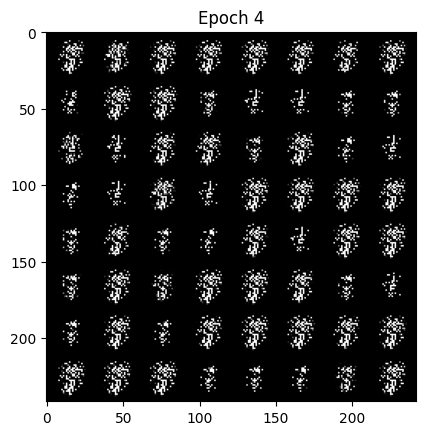

Epoch [5/50] Batch 0/938 Loss D: 0.0222, Loss G: 6.9691
Epoch [5/50] Batch 100/938 Loss D: 0.0038, Loss G: 7.5322
Epoch [5/50] Batch 200/938 Loss D: 0.0005, Loss G: 8.1210
Epoch [5/50] Batch 300/938 Loss D: 0.0331, Loss G: 7.4187
Epoch [5/50] Batch 400/938 Loss D: 0.2515, Loss G: 7.6620
Epoch [5/50] Batch 500/938 Loss D: 0.0363, Loss G: 6.3721
Epoch [5/50] Batch 600/938 Loss D: 0.0745, Loss G: 8.1813
Epoch [5/50] Batch 700/938 Loss D: 0.0098, Loss G: 7.2227
Epoch [5/50] Batch 800/938 Loss D: 0.0060, Loss G: 6.2350
Epoch [5/50] Batch 900/938 Loss D: 0.0062, Loss G: 6.3804


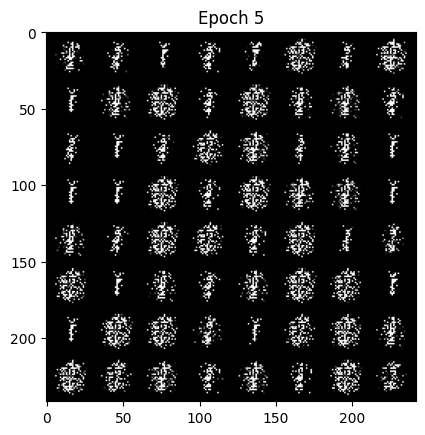

Epoch [6/50] Batch 0/938 Loss D: 0.0057, Loss G: 7.8569
Epoch [6/50] Batch 100/938 Loss D: 0.0666, Loss G: 5.7969
Epoch [6/50] Batch 200/938 Loss D: 0.2016, Loss G: 5.3862
Epoch [6/50] Batch 300/938 Loss D: 0.0621, Loss G: 6.8704
Epoch [6/50] Batch 400/938 Loss D: 0.0215, Loss G: 7.6223
Epoch [6/50] Batch 500/938 Loss D: 0.2647, Loss G: 8.1943
Epoch [6/50] Batch 600/938 Loss D: 0.0054, Loss G: 6.8882
Epoch [6/50] Batch 700/938 Loss D: 0.0539, Loss G: 6.9807
Epoch [6/50] Batch 800/938 Loss D: 0.0657, Loss G: 7.8018
Epoch [6/50] Batch 900/938 Loss D: 0.1239, Loss G: 4.2560


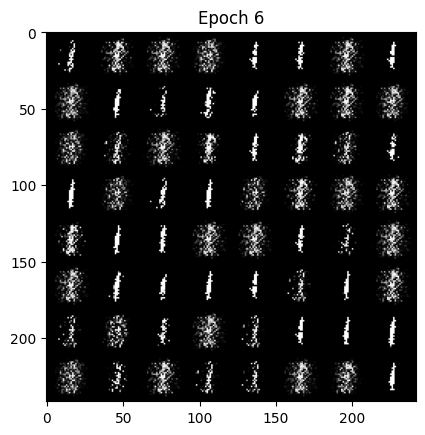

Epoch [7/50] Batch 0/938 Loss D: 0.1067, Loss G: 3.2348
Epoch [7/50] Batch 100/938 Loss D: 0.3602, Loss G: 2.1807
Epoch [7/50] Batch 200/938 Loss D: 0.3206, Loss G: 4.1637
Epoch [7/50] Batch 300/938 Loss D: 0.3526, Loss G: 4.0023
Epoch [7/50] Batch 400/938 Loss D: 0.7367, Loss G: 3.2953
Epoch [7/50] Batch 500/938 Loss D: 0.8416, Loss G: 2.2277
Epoch [7/50] Batch 600/938 Loss D: 1.0279, Loss G: 0.9789
Epoch [7/50] Batch 700/938 Loss D: 0.2145, Loss G: 3.5518
Epoch [7/50] Batch 800/938 Loss D: 0.1766, Loss G: 4.1811
Epoch [7/50] Batch 900/938 Loss D: 1.5441, Loss G: 1.0599


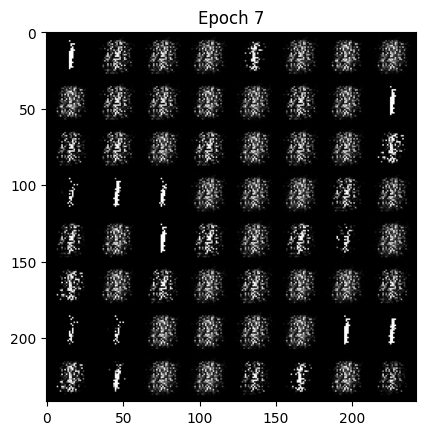

Epoch [8/50] Batch 0/938 Loss D: 1.0486, Loss G: 3.4357
Epoch [8/50] Batch 100/938 Loss D: 0.4183, Loss G: 3.7363
Epoch [8/50] Batch 200/938 Loss D: 0.0411, Loss G: 5.6004
Epoch [8/50] Batch 300/938 Loss D: 0.0334, Loss G: 6.3298
Epoch [8/50] Batch 400/938 Loss D: 0.3566, Loss G: 3.6993
Epoch [8/50] Batch 500/938 Loss D: 0.8176, Loss G: 4.2004
Epoch [8/50] Batch 600/938 Loss D: 0.6447, Loss G: 2.6543
Epoch [8/50] Batch 700/938 Loss D: 0.2696, Loss G: 2.4933
Epoch [8/50] Batch 800/938 Loss D: 0.7108, Loss G: 1.7222
Epoch [8/50] Batch 900/938 Loss D: 1.4913, Loss G: 1.9649


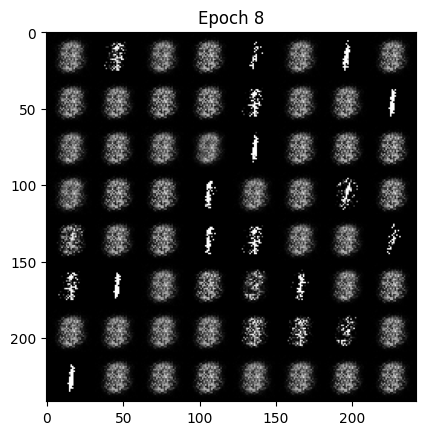

Epoch [9/50] Batch 0/938 Loss D: 0.5089, Loss G: 2.1957
Epoch [9/50] Batch 100/938 Loss D: 0.6713, Loss G: 2.6222
Epoch [9/50] Batch 200/938 Loss D: 1.5629, Loss G: 1.6454
Epoch [9/50] Batch 300/938 Loss D: 0.8341, Loss G: 1.5778
Epoch [9/50] Batch 400/938 Loss D: 1.0441, Loss G: 5.3164
Epoch [9/50] Batch 500/938 Loss D: 0.0837, Loss G: 3.2337
Epoch [9/50] Batch 600/938 Loss D: 0.3994, Loss G: 3.3565
Epoch [9/50] Batch 700/938 Loss D: 0.4365, Loss G: 2.8689
Epoch [9/50] Batch 800/938 Loss D: 0.7743, Loss G: 2.0559
Epoch [9/50] Batch 900/938 Loss D: 0.3602, Loss G: 2.0274


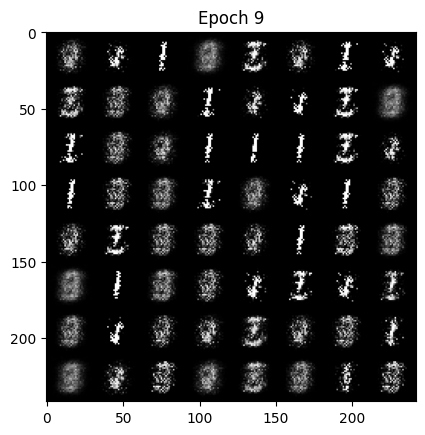

Epoch [10/50] Batch 0/938 Loss D: 0.2211, Loss G: 2.4738
Epoch [10/50] Batch 100/938 Loss D: 0.3096, Loss G: 3.9502
Epoch [10/50] Batch 200/938 Loss D: 0.1738, Loss G: 3.4992
Epoch [10/50] Batch 300/938 Loss D: 0.3130, Loss G: 3.8085
Epoch [10/50] Batch 400/938 Loss D: 0.2121, Loss G: 4.2564
Epoch [10/50] Batch 500/938 Loss D: 0.0664, Loss G: 6.1921
Epoch [10/50] Batch 600/938 Loss D: 0.5157, Loss G: 3.8986
Epoch [10/50] Batch 700/938 Loss D: 0.0789, Loss G: 4.5410
Epoch [10/50] Batch 800/938 Loss D: 0.5975, Loss G: 3.3373
Epoch [10/50] Batch 900/938 Loss D: 0.1291, Loss G: 4.0514


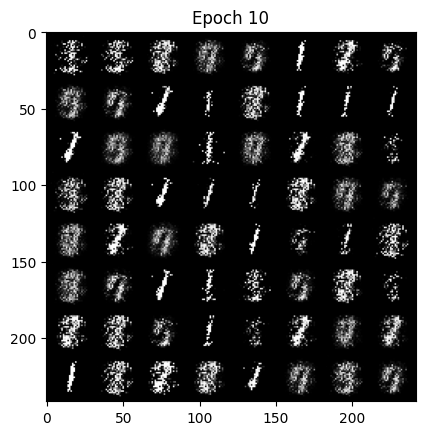

Epoch [11/50] Batch 0/938 Loss D: 1.6179, Loss G: 4.8702
Epoch [11/50] Batch 100/938 Loss D: 0.3422, Loss G: 4.1673
Epoch [11/50] Batch 200/938 Loss D: 0.5752, Loss G: 3.6123
Epoch [11/50] Batch 300/938 Loss D: 0.2438, Loss G: 4.2856
Epoch [11/50] Batch 400/938 Loss D: 0.5649, Loss G: 4.1559
Epoch [11/50] Batch 500/938 Loss D: 0.4389, Loss G: 3.4800
Epoch [11/50] Batch 600/938 Loss D: 0.4634, Loss G: 3.7706
Epoch [11/50] Batch 700/938 Loss D: 0.2415, Loss G: 4.3291
Epoch [11/50] Batch 800/938 Loss D: 0.3031, Loss G: 3.0551
Epoch [11/50] Batch 900/938 Loss D: 0.7775, Loss G: 4.0222


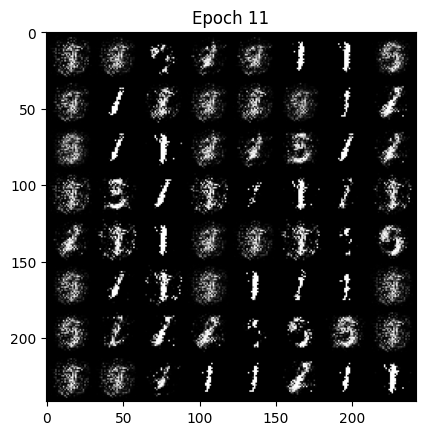

Epoch [12/50] Batch 0/938 Loss D: 0.3804, Loss G: 2.5426
Epoch [12/50] Batch 100/938 Loss D: 0.5426, Loss G: 4.0967
Epoch [12/50] Batch 200/938 Loss D: 0.3681, Loss G: 3.1526
Epoch [12/50] Batch 300/938 Loss D: 0.3369, Loss G: 2.7121
Epoch [12/50] Batch 400/938 Loss D: 0.4224, Loss G: 4.0595
Epoch [12/50] Batch 500/938 Loss D: 0.5244, Loss G: 2.9727
Epoch [12/50] Batch 600/938 Loss D: 0.4238, Loss G: 2.6699
Epoch [12/50] Batch 700/938 Loss D: 0.2567, Loss G: 2.4660
Epoch [12/50] Batch 800/938 Loss D: 0.1825, Loss G: 4.2665
Epoch [12/50] Batch 900/938 Loss D: 0.1880, Loss G: 3.3886


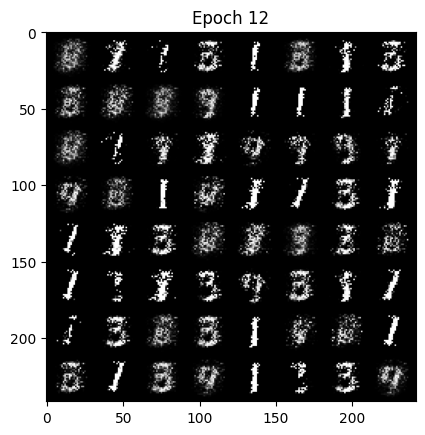

Epoch [13/50] Batch 0/938 Loss D: 0.3284, Loss G: 3.3184
Epoch [13/50] Batch 100/938 Loss D: 0.1787, Loss G: 3.9233
Epoch [13/50] Batch 200/938 Loss D: 0.4117, Loss G: 2.5878
Epoch [13/50] Batch 300/938 Loss D: 0.4292, Loss G: 2.2799
Epoch [13/50] Batch 400/938 Loss D: 0.3394, Loss G: 2.4960
Epoch [13/50] Batch 500/938 Loss D: 0.1478, Loss G: 2.6097
Epoch [13/50] Batch 600/938 Loss D: 0.3461, Loss G: 2.8720
Epoch [13/50] Batch 700/938 Loss D: 0.3480, Loss G: 3.2547
Epoch [13/50] Batch 800/938 Loss D: 0.1773, Loss G: 4.4840
Epoch [13/50] Batch 900/938 Loss D: 0.3629, Loss G: 1.9902


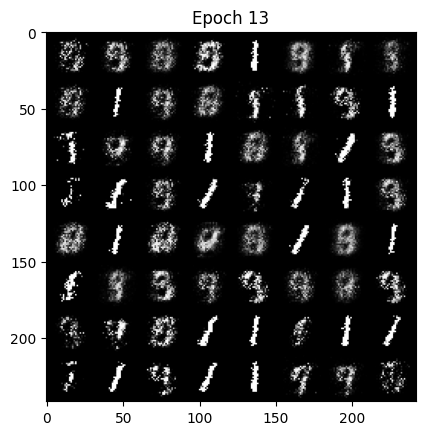

Epoch [14/50] Batch 0/938 Loss D: 0.6250, Loss G: 3.2036
Epoch [14/50] Batch 100/938 Loss D: 0.2383, Loss G: 3.9299
Epoch [14/50] Batch 200/938 Loss D: 0.6908, Loss G: 2.5044
Epoch [14/50] Batch 300/938 Loss D: 0.2788, Loss G: 5.0102
Epoch [14/50] Batch 400/938 Loss D: 0.2566, Loss G: 4.0127
Epoch [14/50] Batch 500/938 Loss D: 0.1910, Loss G: 2.8810
Epoch [14/50] Batch 600/938 Loss D: 0.3911, Loss G: 4.1889
Epoch [14/50] Batch 700/938 Loss D: 0.6455, Loss G: 1.7750
Epoch [14/50] Batch 800/938 Loss D: 0.4833, Loss G: 2.2793
Epoch [14/50] Batch 900/938 Loss D: 0.2493, Loss G: 4.1381


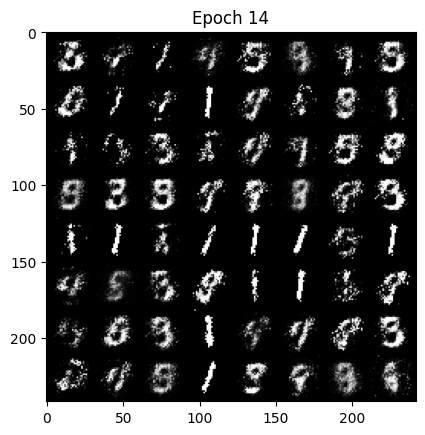

Epoch [15/50] Batch 0/938 Loss D: 0.2927, Loss G: 4.1047
Epoch [15/50] Batch 100/938 Loss D: 0.3548, Loss G: 3.4197
Epoch [15/50] Batch 200/938 Loss D: 0.4217, Loss G: 1.9413
Epoch [15/50] Batch 300/938 Loss D: 0.5347, Loss G: 4.5076
Epoch [15/50] Batch 400/938 Loss D: 0.5005, Loss G: 3.2703
Epoch [15/50] Batch 500/938 Loss D: 0.2472, Loss G: 3.9986
Epoch [15/50] Batch 600/938 Loss D: 0.4165, Loss G: 3.7691
Epoch [15/50] Batch 700/938 Loss D: 0.3748, Loss G: 2.8324
Epoch [15/50] Batch 800/938 Loss D: 0.2093, Loss G: 3.5317
Epoch [15/50] Batch 900/938 Loss D: 0.2886, Loss G: 3.5453


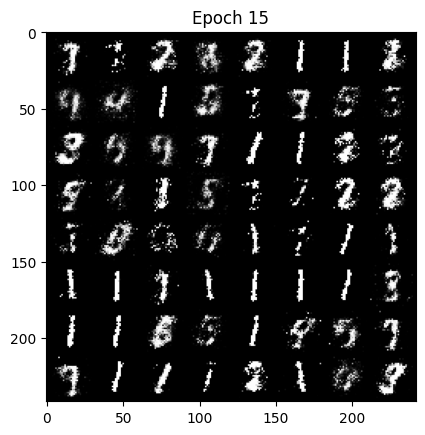

Epoch [16/50] Batch 0/938 Loss D: 0.5692, Loss G: 2.4117
Epoch [16/50] Batch 100/938 Loss D: 0.5687, Loss G: 3.7653
Epoch [16/50] Batch 200/938 Loss D: 0.5249, Loss G: 3.1290
Epoch [16/50] Batch 300/938 Loss D: 0.2711, Loss G: 2.9791
Epoch [16/50] Batch 400/938 Loss D: 0.2889, Loss G: 2.9125
Epoch [16/50] Batch 500/938 Loss D: 0.2299, Loss G: 4.5546
Epoch [16/50] Batch 600/938 Loss D: 0.3584, Loss G: 2.8665
Epoch [16/50] Batch 700/938 Loss D: 0.4055, Loss G: 2.8929
Epoch [16/50] Batch 800/938 Loss D: 0.3498, Loss G: 4.0488
Epoch [16/50] Batch 900/938 Loss D: 0.2657, Loss G: 3.4147


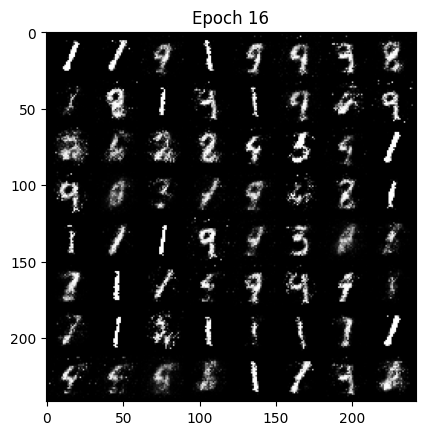

Epoch [17/50] Batch 0/938 Loss D: 0.2587, Loss G: 3.2090
Epoch [17/50] Batch 100/938 Loss D: 0.5072, Loss G: 2.6887
Epoch [17/50] Batch 200/938 Loss D: 0.5123, Loss G: 3.6623
Epoch [17/50] Batch 300/938 Loss D: 0.3994, Loss G: 2.6241
Epoch [17/50] Batch 400/938 Loss D: 0.5587, Loss G: 2.5246
Epoch [17/50] Batch 500/938 Loss D: 0.5308, Loss G: 3.4524
Epoch [17/50] Batch 600/938 Loss D: 0.4136, Loss G: 2.0862
Epoch [17/50] Batch 700/938 Loss D: 0.5100, Loss G: 2.0617
Epoch [17/50] Batch 800/938 Loss D: 0.7368, Loss G: 2.1504
Epoch [17/50] Batch 900/938 Loss D: 0.4576, Loss G: 3.0376


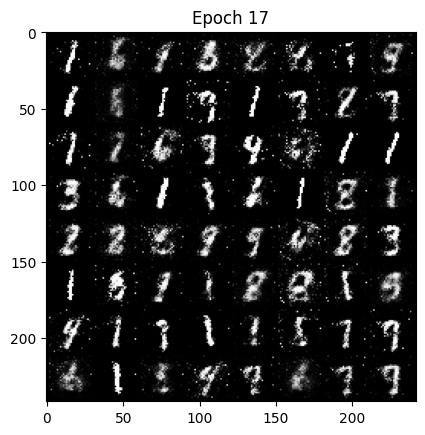

Epoch [18/50] Batch 0/938 Loss D: 0.3548, Loss G: 2.3072
Epoch [18/50] Batch 100/938 Loss D: 0.3203, Loss G: 3.6152
Epoch [18/50] Batch 200/938 Loss D: 0.7149, Loss G: 3.5927
Epoch [18/50] Batch 300/938 Loss D: 0.6791, Loss G: 3.3919
Epoch [18/50] Batch 400/938 Loss D: 0.5824, Loss G: 2.8249
Epoch [18/50] Batch 500/938 Loss D: 0.5256, Loss G: 2.3427
Epoch [18/50] Batch 600/938 Loss D: 0.6393, Loss G: 3.0283
Epoch [18/50] Batch 700/938 Loss D: 0.5965, Loss G: 1.8906
Epoch [18/50] Batch 800/938 Loss D: 0.3091, Loss G: 3.1035
Epoch [18/50] Batch 900/938 Loss D: 0.3938, Loss G: 3.4574


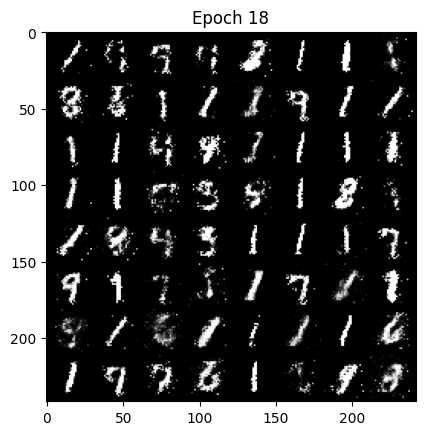

Epoch [19/50] Batch 0/938 Loss D: 0.6650, Loss G: 2.5881
Epoch [19/50] Batch 100/938 Loss D: 0.4842, Loss G: 2.7303
Epoch [19/50] Batch 200/938 Loss D: 0.5303, Loss G: 3.0436
Epoch [19/50] Batch 300/938 Loss D: 0.4861, Loss G: 2.3413
Epoch [19/50] Batch 400/938 Loss D: 0.4058, Loss G: 2.3614
Epoch [19/50] Batch 500/938 Loss D: 0.9331, Loss G: 2.4463
Epoch [19/50] Batch 600/938 Loss D: 0.4749, Loss G: 2.3759
Epoch [19/50] Batch 700/938 Loss D: 0.4018, Loss G: 2.7405
Epoch [19/50] Batch 800/938 Loss D: 0.5423, Loss G: 2.7345
Epoch [19/50] Batch 900/938 Loss D: 0.4728, Loss G: 3.0581


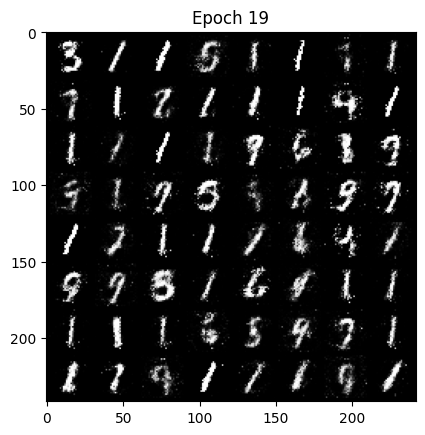

Epoch [20/50] Batch 0/938 Loss D: 0.4617, Loss G: 2.8588
Epoch [20/50] Batch 100/938 Loss D: 0.5154, Loss G: 2.2067
Epoch [20/50] Batch 200/938 Loss D: 0.5836, Loss G: 3.5342
Epoch [20/50] Batch 300/938 Loss D: 0.4646, Loss G: 2.7368
Epoch [20/50] Batch 400/938 Loss D: 0.5625, Loss G: 3.3393
Epoch [20/50] Batch 500/938 Loss D: 0.5524, Loss G: 3.5269
Epoch [20/50] Batch 600/938 Loss D: 0.6228, Loss G: 2.2952
Epoch [20/50] Batch 700/938 Loss D: 0.8663, Loss G: 2.9568
Epoch [20/50] Batch 800/938 Loss D: 0.7195, Loss G: 1.9409
Epoch [20/50] Batch 900/938 Loss D: 0.4139, Loss G: 1.7742


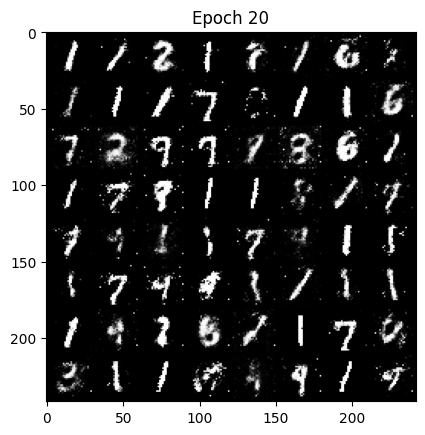

Epoch [21/50] Batch 0/938 Loss D: 0.5968, Loss G: 3.6949
Epoch [21/50] Batch 100/938 Loss D: 0.7300, Loss G: 2.7576
Epoch [21/50] Batch 200/938 Loss D: 0.3927, Loss G: 2.4104
Epoch [21/50] Batch 300/938 Loss D: 0.6261, Loss G: 2.3237
Epoch [21/50] Batch 400/938 Loss D: 0.6052, Loss G: 2.3989
Epoch [21/50] Batch 500/938 Loss D: 0.5513, Loss G: 2.8450
Epoch [21/50] Batch 600/938 Loss D: 0.7749, Loss G: 2.5979
Epoch [21/50] Batch 700/938 Loss D: 0.5894, Loss G: 3.0399
Epoch [21/50] Batch 800/938 Loss D: 0.4588, Loss G: 1.8564
Epoch [21/50] Batch 900/938 Loss D: 0.6101, Loss G: 1.9433


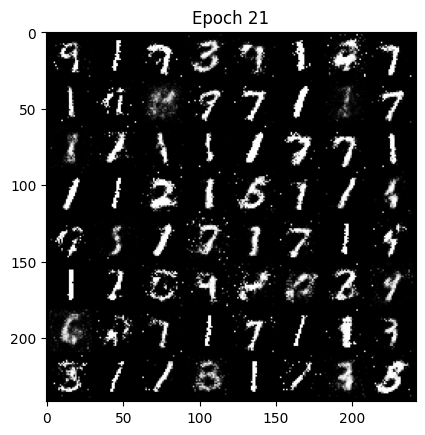

Epoch [22/50] Batch 0/938 Loss D: 0.5968, Loss G: 2.4131
Epoch [22/50] Batch 100/938 Loss D: 0.5566, Loss G: 2.4114
Epoch [22/50] Batch 200/938 Loss D: 0.7171, Loss G: 1.9459
Epoch [22/50] Batch 300/938 Loss D: 0.8046, Loss G: 2.4893
Epoch [22/50] Batch 400/938 Loss D: 0.4429, Loss G: 2.3795
Epoch [22/50] Batch 500/938 Loss D: 0.6963, Loss G: 2.0277
Epoch [22/50] Batch 600/938 Loss D: 0.5069, Loss G: 2.4032
Epoch [22/50] Batch 700/938 Loss D: 0.7268, Loss G: 2.4027
Epoch [22/50] Batch 800/938 Loss D: 0.5985, Loss G: 1.7628
Epoch [22/50] Batch 900/938 Loss D: 0.7170, Loss G: 1.7296


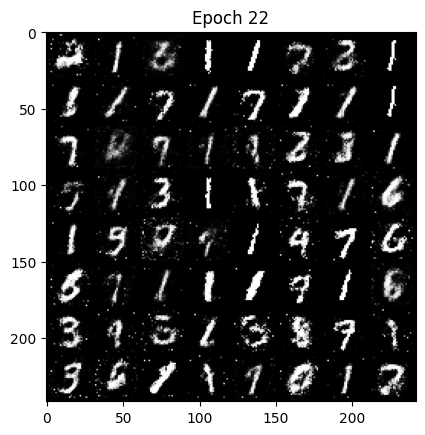

Epoch [23/50] Batch 0/938 Loss D: 0.4938, Loss G: 2.0182
Epoch [23/50] Batch 100/938 Loss D: 0.5179, Loss G: 1.7976
Epoch [23/50] Batch 200/938 Loss D: 0.4622, Loss G: 2.5986
Epoch [23/50] Batch 300/938 Loss D: 0.6806, Loss G: 1.5792
Epoch [23/50] Batch 400/938 Loss D: 0.7672, Loss G: 2.6744
Epoch [23/50] Batch 500/938 Loss D: 0.5577, Loss G: 2.1950
Epoch [23/50] Batch 600/938 Loss D: 0.5888, Loss G: 2.1124
Epoch [23/50] Batch 700/938 Loss D: 0.5116, Loss G: 2.9884
Epoch [23/50] Batch 800/938 Loss D: 0.8835, Loss G: 1.9915
Epoch [23/50] Batch 900/938 Loss D: 0.7909, Loss G: 2.5757


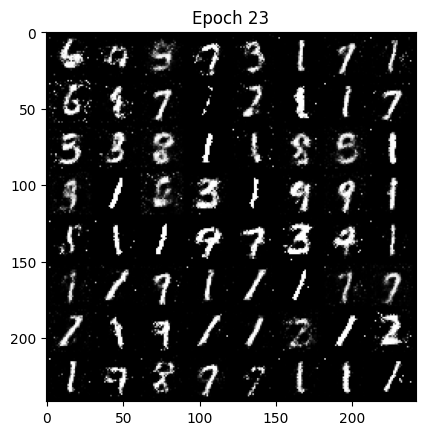

Epoch [24/50] Batch 0/938 Loss D: 0.8954, Loss G: 2.0027
Epoch [24/50] Batch 100/938 Loss D: 0.7544, Loss G: 2.4877
Epoch [24/50] Batch 200/938 Loss D: 0.6973, Loss G: 2.3451
Epoch [24/50] Batch 300/938 Loss D: 0.8103, Loss G: 2.1109
Epoch [24/50] Batch 400/938 Loss D: 0.6193, Loss G: 2.1983
Epoch [24/50] Batch 500/938 Loss D: 0.5879, Loss G: 2.5717
Epoch [24/50] Batch 600/938 Loss D: 0.6357, Loss G: 2.2092
Epoch [24/50] Batch 700/938 Loss D: 0.7679, Loss G: 2.2966
Epoch [24/50] Batch 800/938 Loss D: 0.7925, Loss G: 2.3196
Epoch [24/50] Batch 900/938 Loss D: 0.7513, Loss G: 1.6871


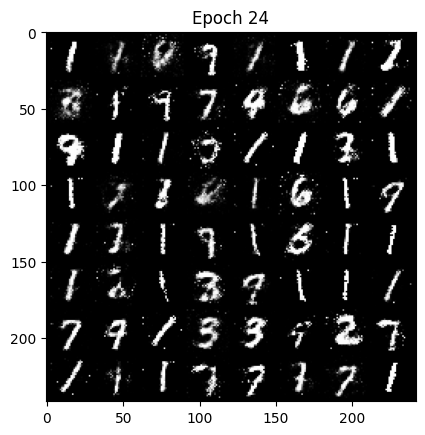

Epoch [25/50] Batch 0/938 Loss D: 0.7499, Loss G: 2.1230
Epoch [25/50] Batch 100/938 Loss D: 0.7223, Loss G: 1.8518
Epoch [25/50] Batch 200/938 Loss D: 0.6917, Loss G: 2.9702
Epoch [25/50] Batch 300/938 Loss D: 0.4935, Loss G: 2.3799
Epoch [25/50] Batch 400/938 Loss D: 0.5988, Loss G: 1.9924
Epoch [25/50] Batch 500/938 Loss D: 0.5382, Loss G: 2.9937
Epoch [25/50] Batch 600/938 Loss D: 0.5833, Loss G: 1.9879
Epoch [25/50] Batch 700/938 Loss D: 0.8880, Loss G: 1.7363
Epoch [25/50] Batch 800/938 Loss D: 0.8931, Loss G: 1.9269
Epoch [25/50] Batch 900/938 Loss D: 0.9873, Loss G: 2.5433


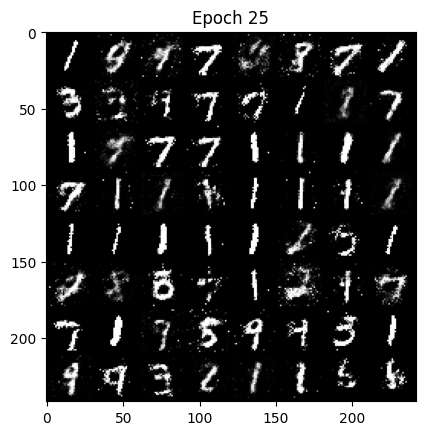

Epoch [26/50] Batch 0/938 Loss D: 0.6333, Loss G: 2.7542
Epoch [26/50] Batch 100/938 Loss D: 0.6757, Loss G: 2.0751
Epoch [26/50] Batch 200/938 Loss D: 0.8921, Loss G: 2.1723
Epoch [26/50] Batch 300/938 Loss D: 0.6239, Loss G: 1.9628
Epoch [26/50] Batch 400/938 Loss D: 0.6020, Loss G: 2.3553
Epoch [26/50] Batch 500/938 Loss D: 0.9322, Loss G: 1.6170
Epoch [26/50] Batch 600/938 Loss D: 0.7117, Loss G: 1.7113
Epoch [26/50] Batch 700/938 Loss D: 0.6617, Loss G: 2.0398
Epoch [26/50] Batch 800/938 Loss D: 0.7071, Loss G: 1.5171
Epoch [26/50] Batch 900/938 Loss D: 0.7986, Loss G: 2.2692


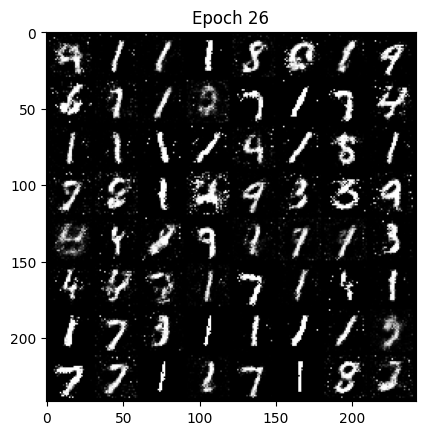

Epoch [27/50] Batch 0/938 Loss D: 0.6798, Loss G: 2.1545
Epoch [27/50] Batch 100/938 Loss D: 0.6935, Loss G: 1.6673
Epoch [27/50] Batch 200/938 Loss D: 0.6069, Loss G: 1.7739
Epoch [27/50] Batch 300/938 Loss D: 0.5592, Loss G: 2.0443
Epoch [27/50] Batch 400/938 Loss D: 0.9746, Loss G: 1.1369
Epoch [27/50] Batch 500/938 Loss D: 0.9158, Loss G: 2.2189
Epoch [27/50] Batch 600/938 Loss D: 0.5313, Loss G: 2.6283
Epoch [27/50] Batch 700/938 Loss D: 0.8387, Loss G: 2.0113
Epoch [27/50] Batch 800/938 Loss D: 0.6119, Loss G: 1.9985
Epoch [27/50] Batch 900/938 Loss D: 0.9370, Loss G: 1.5395


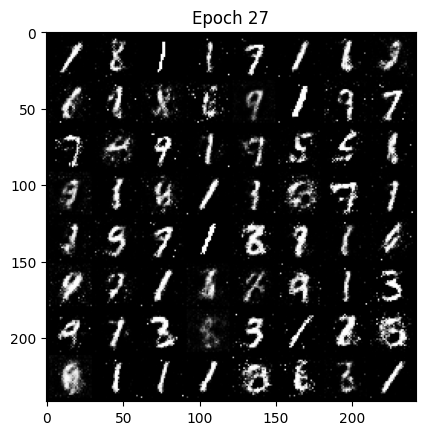

Epoch [28/50] Batch 0/938 Loss D: 0.8828, Loss G: 2.1237
Epoch [28/50] Batch 100/938 Loss D: 0.8916, Loss G: 1.6772
Epoch [28/50] Batch 200/938 Loss D: 0.6653, Loss G: 2.4230
Epoch [28/50] Batch 300/938 Loss D: 0.6119, Loss G: 2.2055
Epoch [28/50] Batch 400/938 Loss D: 0.6959, Loss G: 1.6750
Epoch [28/50] Batch 500/938 Loss D: 0.7804, Loss G: 1.2516
Epoch [28/50] Batch 600/938 Loss D: 0.6189, Loss G: 1.8927
Epoch [28/50] Batch 700/938 Loss D: 0.7497, Loss G: 1.8432
Epoch [28/50] Batch 800/938 Loss D: 0.8414, Loss G: 2.0546
Epoch [28/50] Batch 900/938 Loss D: 0.6933, Loss G: 2.1076


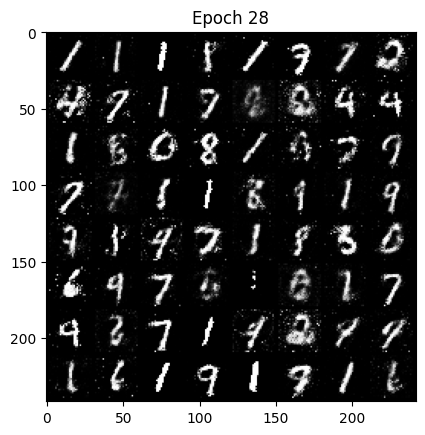

Epoch [29/50] Batch 0/938 Loss D: 0.6314, Loss G: 2.1772
Epoch [29/50] Batch 100/938 Loss D: 0.7437, Loss G: 1.6765
Epoch [29/50] Batch 200/938 Loss D: 0.7272, Loss G: 2.2873
Epoch [29/50] Batch 300/938 Loss D: 0.8527, Loss G: 1.3973
Epoch [29/50] Batch 400/938 Loss D: 0.7149, Loss G: 1.5892
Epoch [29/50] Batch 500/938 Loss D: 0.6814, Loss G: 1.8389
Epoch [29/50] Batch 600/938 Loss D: 0.7269, Loss G: 2.1674
Epoch [29/50] Batch 700/938 Loss D: 0.7966, Loss G: 2.2276
Epoch [29/50] Batch 800/938 Loss D: 0.6738, Loss G: 2.0669
Epoch [29/50] Batch 900/938 Loss D: 0.5870, Loss G: 1.9740


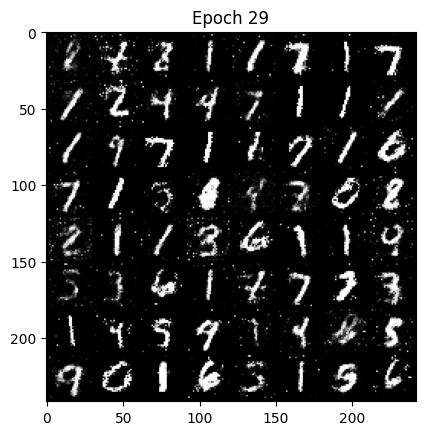

Epoch [30/50] Batch 0/938 Loss D: 0.8819, Loss G: 1.7012
Epoch [30/50] Batch 100/938 Loss D: 0.6691, Loss G: 2.0840
Epoch [30/50] Batch 200/938 Loss D: 0.6471, Loss G: 2.0303
Epoch [30/50] Batch 300/938 Loss D: 0.7515, Loss G: 2.1337
Epoch [30/50] Batch 400/938 Loss D: 0.6000, Loss G: 1.4471
Epoch [30/50] Batch 500/938 Loss D: 0.7846, Loss G: 2.3471
Epoch [30/50] Batch 600/938 Loss D: 0.9396, Loss G: 2.0548
Epoch [30/50] Batch 700/938 Loss D: 0.5921, Loss G: 2.4853
Epoch [30/50] Batch 800/938 Loss D: 0.7453, Loss G: 2.1515
Epoch [30/50] Batch 900/938 Loss D: 0.5993, Loss G: 1.6794


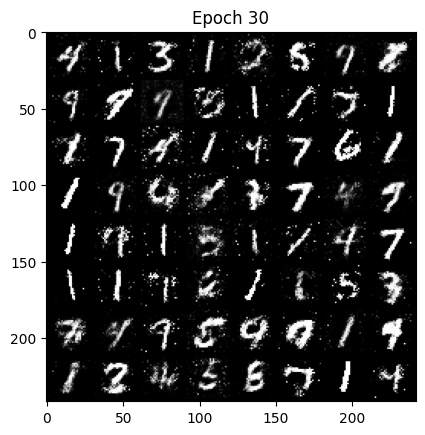

Epoch [31/50] Batch 0/938 Loss D: 0.7099, Loss G: 1.6903
Epoch [31/50] Batch 100/938 Loss D: 0.4282, Loss G: 1.8406
Epoch [31/50] Batch 200/938 Loss D: 0.7010, Loss G: 1.9644
Epoch [31/50] Batch 300/938 Loss D: 0.6233, Loss G: 1.8538
Epoch [31/50] Batch 400/938 Loss D: 0.8202, Loss G: 2.0311
Epoch [31/50] Batch 500/938 Loss D: 0.8567, Loss G: 1.8711
Epoch [31/50] Batch 600/938 Loss D: 0.8373, Loss G: 2.2983
Epoch [31/50] Batch 700/938 Loss D: 0.7309, Loss G: 1.9716
Epoch [31/50] Batch 800/938 Loss D: 0.7895, Loss G: 1.7350
Epoch [31/50] Batch 900/938 Loss D: 0.9071, Loss G: 1.4587


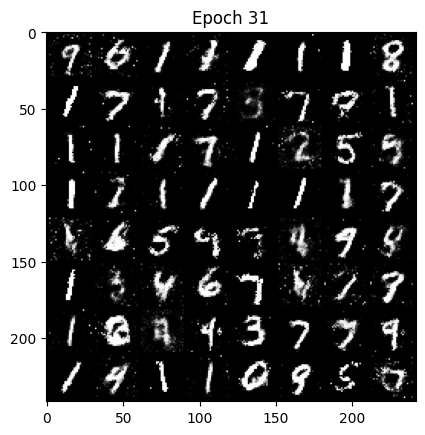

Epoch [32/50] Batch 0/938 Loss D: 0.7537, Loss G: 2.4464
Epoch [32/50] Batch 100/938 Loss D: 0.9808, Loss G: 1.8308
Epoch [32/50] Batch 200/938 Loss D: 0.7602, Loss G: 1.9667
Epoch [32/50] Batch 300/938 Loss D: 0.7032, Loss G: 1.7549
Epoch [32/50] Batch 400/938 Loss D: 0.6431, Loss G: 2.7874
Epoch [32/50] Batch 500/938 Loss D: 0.6546, Loss G: 1.7474
Epoch [32/50] Batch 600/938 Loss D: 0.9039, Loss G: 1.2693
Epoch [32/50] Batch 700/938 Loss D: 0.7246, Loss G: 1.6369
Epoch [32/50] Batch 800/938 Loss D: 0.8811, Loss G: 1.7825
Epoch [32/50] Batch 900/938 Loss D: 0.6769, Loss G: 2.3802


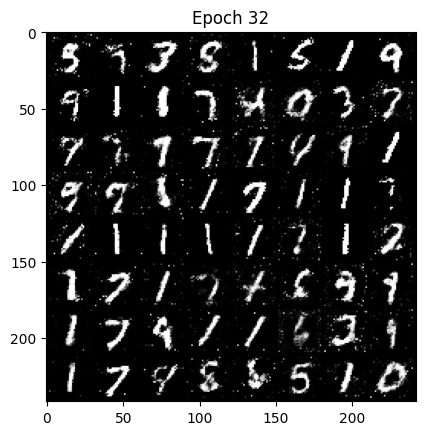

Epoch [33/50] Batch 0/938 Loss D: 0.7369, Loss G: 1.0551
Epoch [33/50] Batch 100/938 Loss D: 0.7338, Loss G: 1.7560
Epoch [33/50] Batch 200/938 Loss D: 0.6183, Loss G: 1.9429
Epoch [33/50] Batch 300/938 Loss D: 0.9321, Loss G: 1.6828
Epoch [33/50] Batch 400/938 Loss D: 0.7809, Loss G: 1.8169
Epoch [33/50] Batch 500/938 Loss D: 0.5215, Loss G: 2.2134
Epoch [33/50] Batch 600/938 Loss D: 0.7341, Loss G: 1.7275
Epoch [33/50] Batch 700/938 Loss D: 0.6900, Loss G: 2.2257
Epoch [33/50] Batch 800/938 Loss D: 0.5142, Loss G: 2.3089
Epoch [33/50] Batch 900/938 Loss D: 0.7729, Loss G: 1.5995


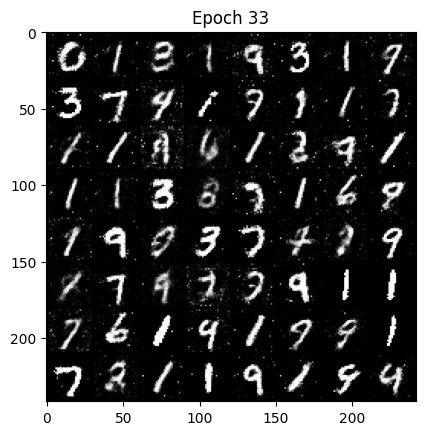

Epoch [34/50] Batch 0/938 Loss D: 1.0323, Loss G: 2.3611
Epoch [34/50] Batch 100/938 Loss D: 0.7189, Loss G: 1.8662
Epoch [34/50] Batch 200/938 Loss D: 0.4939, Loss G: 2.2390
Epoch [34/50] Batch 300/938 Loss D: 0.6026, Loss G: 2.3492
Epoch [34/50] Batch 400/938 Loss D: 0.8616, Loss G: 1.8974
Epoch [34/50] Batch 500/938 Loss D: 0.8048, Loss G: 1.9775
Epoch [34/50] Batch 600/938 Loss D: 0.7474, Loss G: 1.9853
Epoch [34/50] Batch 700/938 Loss D: 0.9018, Loss G: 1.8158
Epoch [34/50] Batch 800/938 Loss D: 0.7162, Loss G: 2.3780
Epoch [34/50] Batch 900/938 Loss D: 0.8152, Loss G: 1.9877


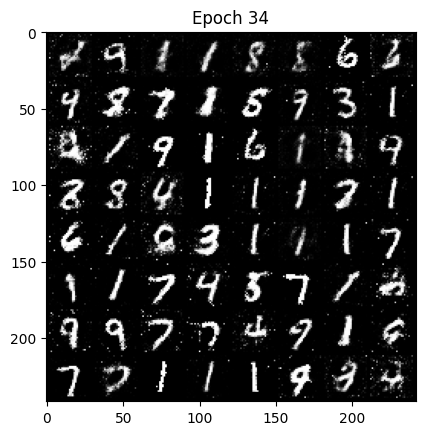

Epoch [35/50] Batch 0/938 Loss D: 0.8478, Loss G: 1.5440
Epoch [35/50] Batch 100/938 Loss D: 0.8624, Loss G: 1.8076
Epoch [35/50] Batch 200/938 Loss D: 1.1594, Loss G: 1.8383
Epoch [35/50] Batch 300/938 Loss D: 0.9384, Loss G: 1.9311
Epoch [35/50] Batch 400/938 Loss D: 0.7570, Loss G: 1.8029
Epoch [35/50] Batch 500/938 Loss D: 0.6829, Loss G: 1.7013
Epoch [35/50] Batch 600/938 Loss D: 0.9862, Loss G: 1.6306
Epoch [35/50] Batch 700/938 Loss D: 1.0621, Loss G: 1.8748
Epoch [35/50] Batch 800/938 Loss D: 0.8016, Loss G: 1.6115
Epoch [35/50] Batch 900/938 Loss D: 0.8611, Loss G: 1.9001


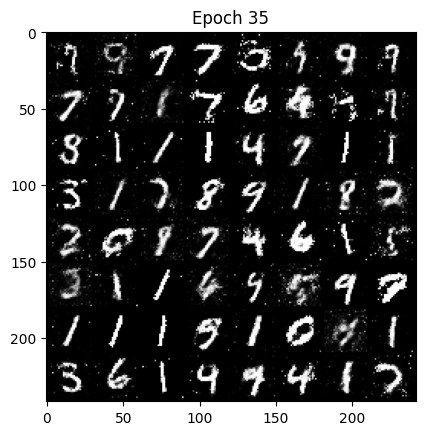

Epoch [36/50] Batch 0/938 Loss D: 0.6141, Loss G: 2.0239
Epoch [36/50] Batch 100/938 Loss D: 0.8395, Loss G: 1.5334
Epoch [36/50] Batch 200/938 Loss D: 0.9494, Loss G: 1.6959
Epoch [36/50] Batch 300/938 Loss D: 0.6021, Loss G: 2.0910
Epoch [36/50] Batch 400/938 Loss D: 0.6154, Loss G: 2.1265
Epoch [36/50] Batch 500/938 Loss D: 0.5540, Loss G: 1.9269
Epoch [36/50] Batch 600/938 Loss D: 0.6574, Loss G: 2.4435
Epoch [36/50] Batch 700/938 Loss D: 0.6825, Loss G: 1.6451
Epoch [36/50] Batch 800/938 Loss D: 0.7315, Loss G: 1.7032
Epoch [36/50] Batch 900/938 Loss D: 0.5620, Loss G: 1.6163


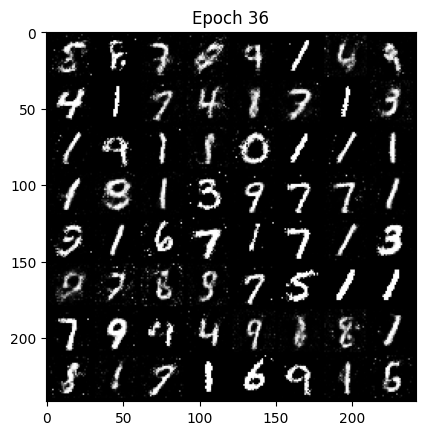

Epoch [37/50] Batch 0/938 Loss D: 1.0354, Loss G: 1.6942
Epoch [37/50] Batch 100/938 Loss D: 0.9343, Loss G: 1.4255
Epoch [37/50] Batch 200/938 Loss D: 0.8255, Loss G: 1.4443
Epoch [37/50] Batch 300/938 Loss D: 1.0306, Loss G: 1.4146
Epoch [37/50] Batch 400/938 Loss D: 0.7506, Loss G: 1.7675
Epoch [37/50] Batch 500/938 Loss D: 1.0375, Loss G: 2.1317
Epoch [37/50] Batch 600/938 Loss D: 0.8556, Loss G: 2.0264
Epoch [37/50] Batch 700/938 Loss D: 0.7601, Loss G: 1.6878
Epoch [37/50] Batch 800/938 Loss D: 0.9587, Loss G: 1.5364
Epoch [37/50] Batch 900/938 Loss D: 0.7603, Loss G: 1.6827


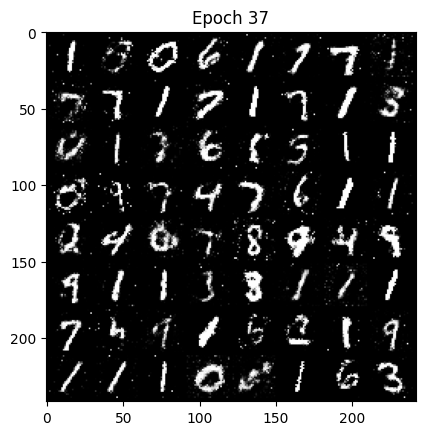

Epoch [38/50] Batch 0/938 Loss D: 0.9601, Loss G: 1.5214
Epoch [38/50] Batch 100/938 Loss D: 0.7561, Loss G: 1.8892
Epoch [38/50] Batch 200/938 Loss D: 0.7688, Loss G: 1.6806
Epoch [38/50] Batch 300/938 Loss D: 0.6778, Loss G: 1.8724
Epoch [38/50] Batch 400/938 Loss D: 0.6653, Loss G: 1.9341
Epoch [38/50] Batch 500/938 Loss D: 0.6648, Loss G: 1.9294
Epoch [38/50] Batch 600/938 Loss D: 0.9083, Loss G: 1.1471
Epoch [38/50] Batch 700/938 Loss D: 0.9891, Loss G: 1.3869
Epoch [38/50] Batch 800/938 Loss D: 0.6644, Loss G: 1.8410
Epoch [38/50] Batch 900/938 Loss D: 0.8019, Loss G: 1.8172


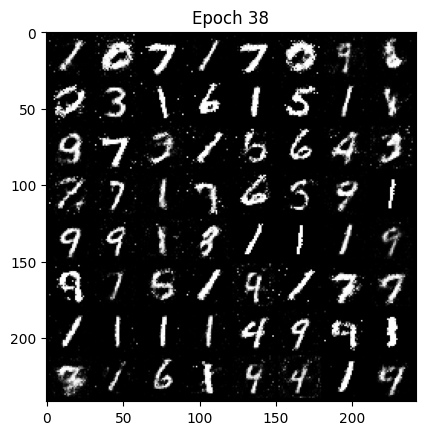

Epoch [39/50] Batch 0/938 Loss D: 0.7342, Loss G: 1.5745
Epoch [39/50] Batch 100/938 Loss D: 0.6375, Loss G: 1.8218
Epoch [39/50] Batch 200/938 Loss D: 0.7965, Loss G: 1.7591
Epoch [39/50] Batch 300/938 Loss D: 0.7210, Loss G: 1.9343
Epoch [39/50] Batch 400/938 Loss D: 0.8956, Loss G: 1.5427
Epoch [39/50] Batch 500/938 Loss D: 0.9116, Loss G: 1.3514
Epoch [39/50] Batch 600/938 Loss D: 0.7532, Loss G: 1.7474
Epoch [39/50] Batch 700/938 Loss D: 1.1028, Loss G: 1.6148
Epoch [39/50] Batch 800/938 Loss D: 0.9872, Loss G: 1.6790
Epoch [39/50] Batch 900/938 Loss D: 0.7808, Loss G: 1.6865


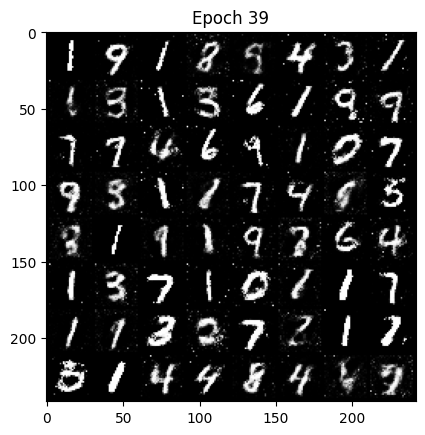

Epoch [40/50] Batch 0/938 Loss D: 0.4321, Loss G: 2.1092
Epoch [40/50] Batch 100/938 Loss D: 0.7824, Loss G: 1.7250
Epoch [40/50] Batch 200/938 Loss D: 1.0645, Loss G: 1.8817
Epoch [40/50] Batch 300/938 Loss D: 0.9570, Loss G: 1.2626
Epoch [40/50] Batch 400/938 Loss D: 1.0458, Loss G: 1.2800
Epoch [40/50] Batch 500/938 Loss D: 0.9005, Loss G: 1.5268
Epoch [40/50] Batch 600/938 Loss D: 1.0994, Loss G: 1.2774
Epoch [40/50] Batch 700/938 Loss D: 0.6522, Loss G: 1.7764
Epoch [40/50] Batch 800/938 Loss D: 0.7252, Loss G: 2.1086
Epoch [40/50] Batch 900/938 Loss D: 0.7406, Loss G: 1.8576


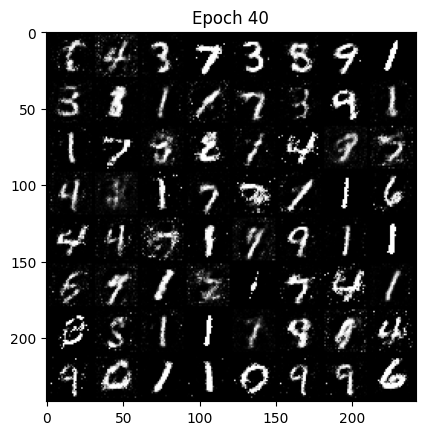

Epoch [41/50] Batch 0/938 Loss D: 0.7294, Loss G: 1.9922
Epoch [41/50] Batch 100/938 Loss D: 0.8411, Loss G: 1.1230
Epoch [41/50] Batch 200/938 Loss D: 0.6902, Loss G: 2.1819
Epoch [41/50] Batch 300/938 Loss D: 0.6552, Loss G: 1.8417
Epoch [41/50] Batch 400/938 Loss D: 0.8087, Loss G: 1.5902
Epoch [41/50] Batch 500/938 Loss D: 0.9818, Loss G: 1.1022
Epoch [41/50] Batch 600/938 Loss D: 0.9708, Loss G: 1.1852
Epoch [41/50] Batch 700/938 Loss D: 0.5591, Loss G: 2.5747
Epoch [41/50] Batch 800/938 Loss D: 0.8511, Loss G: 1.5379
Epoch [41/50] Batch 900/938 Loss D: 0.6514, Loss G: 1.8607


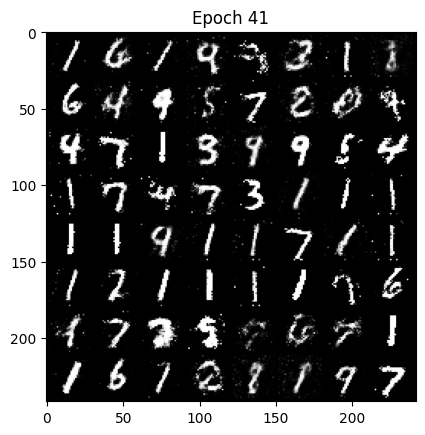

Epoch [42/50] Batch 0/938 Loss D: 0.7915, Loss G: 1.7967
Epoch [42/50] Batch 100/938 Loss D: 0.8386, Loss G: 1.2209
Epoch [42/50] Batch 200/938 Loss D: 1.1901, Loss G: 1.5676
Epoch [42/50] Batch 300/938 Loss D: 0.6860, Loss G: 1.9957
Epoch [42/50] Batch 400/938 Loss D: 0.8016, Loss G: 1.8359
Epoch [42/50] Batch 500/938 Loss D: 1.1828, Loss G: 1.4357
Epoch [42/50] Batch 600/938 Loss D: 1.0713, Loss G: 1.2695
Epoch [42/50] Batch 700/938 Loss D: 1.0468, Loss G: 1.3059
Epoch [42/50] Batch 800/938 Loss D: 0.7290, Loss G: 1.8997
Epoch [42/50] Batch 900/938 Loss D: 0.8937, Loss G: 0.9654


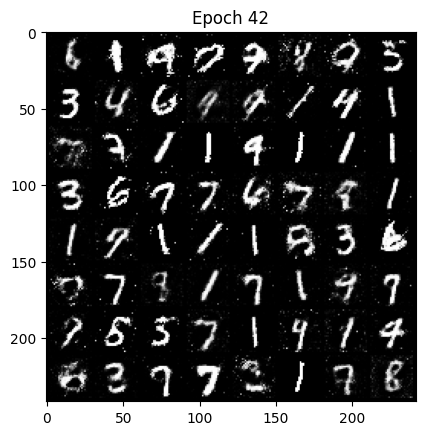

Epoch [43/50] Batch 0/938 Loss D: 0.9097, Loss G: 1.2073
Epoch [43/50] Batch 100/938 Loss D: 0.7781, Loss G: 1.6302
Epoch [43/50] Batch 200/938 Loss D: 0.5943, Loss G: 2.0876
Epoch [43/50] Batch 300/938 Loss D: 0.7490, Loss G: 1.5102
Epoch [43/50] Batch 400/938 Loss D: 1.0046, Loss G: 1.8261
Epoch [43/50] Batch 500/938 Loss D: 0.8395, Loss G: 1.5263
Epoch [43/50] Batch 600/938 Loss D: 0.5616, Loss G: 1.8308
Epoch [43/50] Batch 700/938 Loss D: 0.7450, Loss G: 1.9110
Epoch [43/50] Batch 800/938 Loss D: 1.0228, Loss G: 1.3786
Epoch [43/50] Batch 900/938 Loss D: 0.9786, Loss G: 1.3350


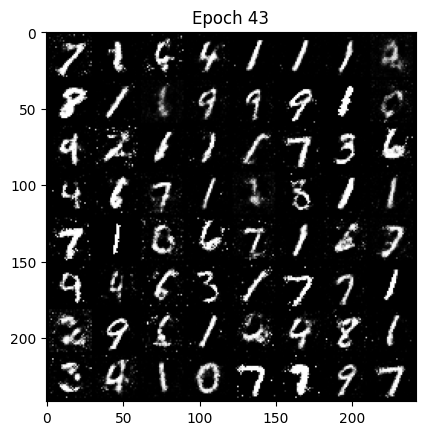

Epoch [44/50] Batch 0/938 Loss D: 0.6407, Loss G: 2.1749
Epoch [44/50] Batch 100/938 Loss D: 0.7544, Loss G: 1.4870
Epoch [44/50] Batch 200/938 Loss D: 1.1762, Loss G: 1.5202
Epoch [44/50] Batch 300/938 Loss D: 0.7745, Loss G: 2.1974
Epoch [44/50] Batch 400/938 Loss D: 0.7862, Loss G: 1.8952
Epoch [44/50] Batch 500/938 Loss D: 0.9166, Loss G: 1.6649
Epoch [44/50] Batch 600/938 Loss D: 0.8080, Loss G: 1.9198
Epoch [44/50] Batch 700/938 Loss D: 0.9325, Loss G: 1.8917
Epoch [44/50] Batch 800/938 Loss D: 0.7042, Loss G: 1.8904
Epoch [44/50] Batch 900/938 Loss D: 0.6988, Loss G: 1.9692


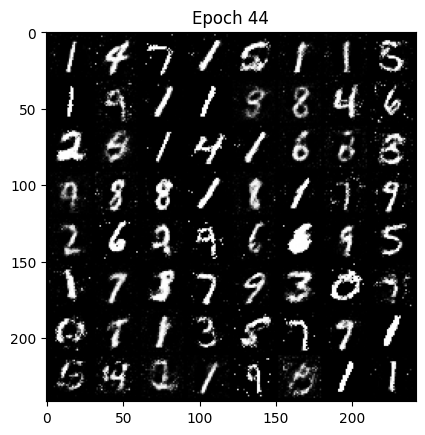

Epoch [45/50] Batch 0/938 Loss D: 0.6848, Loss G: 1.5073
Epoch [45/50] Batch 100/938 Loss D: 0.9163, Loss G: 1.8877
Epoch [45/50] Batch 200/938 Loss D: 0.7711, Loss G: 1.5793
Epoch [45/50] Batch 300/938 Loss D: 0.8643, Loss G: 1.9107
Epoch [45/50] Batch 400/938 Loss D: 0.9174, Loss G: 1.9294
Epoch [45/50] Batch 500/938 Loss D: 0.5406, Loss G: 1.6745
Epoch [45/50] Batch 600/938 Loss D: 1.1961, Loss G: 1.6325
Epoch [45/50] Batch 700/938 Loss D: 0.8901, Loss G: 1.4118
Epoch [45/50] Batch 800/938 Loss D: 0.7899, Loss G: 1.6786
Epoch [45/50] Batch 900/938 Loss D: 0.6009, Loss G: 1.7113


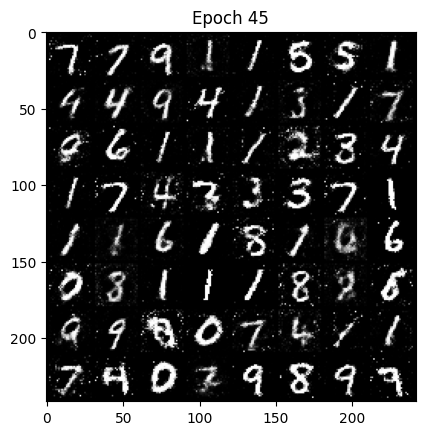

Epoch [46/50] Batch 0/938 Loss D: 0.8485, Loss G: 1.9193
Epoch [46/50] Batch 100/938 Loss D: 0.8877, Loss G: 1.3529
Epoch [46/50] Batch 200/938 Loss D: 1.0215, Loss G: 1.2975
Epoch [46/50] Batch 300/938 Loss D: 1.1934, Loss G: 1.1402
Epoch [46/50] Batch 400/938 Loss D: 0.9096, Loss G: 1.6115
Epoch [46/50] Batch 500/938 Loss D: 0.8057, Loss G: 1.7263
Epoch [46/50] Batch 600/938 Loss D: 0.7078, Loss G: 2.0709
Epoch [46/50] Batch 700/938 Loss D: 0.8988, Loss G: 1.7589
Epoch [46/50] Batch 800/938 Loss D: 0.8888, Loss G: 1.8439
Epoch [46/50] Batch 900/938 Loss D: 0.8436, Loss G: 2.0602


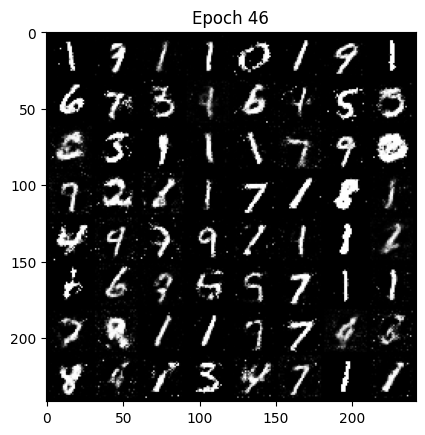

Epoch [47/50] Batch 0/938 Loss D: 0.6937, Loss G: 1.7453
Epoch [47/50] Batch 100/938 Loss D: 0.8034, Loss G: 1.8918
Epoch [47/50] Batch 200/938 Loss D: 0.8509, Loss G: 1.7689
Epoch [47/50] Batch 300/938 Loss D: 0.9865, Loss G: 2.0997
Epoch [47/50] Batch 400/938 Loss D: 0.9610, Loss G: 1.9876
Epoch [47/50] Batch 500/938 Loss D: 0.6852, Loss G: 2.0021
Epoch [47/50] Batch 600/938 Loss D: 0.6938, Loss G: 1.5120
Epoch [47/50] Batch 700/938 Loss D: 0.7719, Loss G: 2.3055
Epoch [47/50] Batch 800/938 Loss D: 0.8062, Loss G: 1.7536
Epoch [47/50] Batch 900/938 Loss D: 0.8633, Loss G: 1.9291


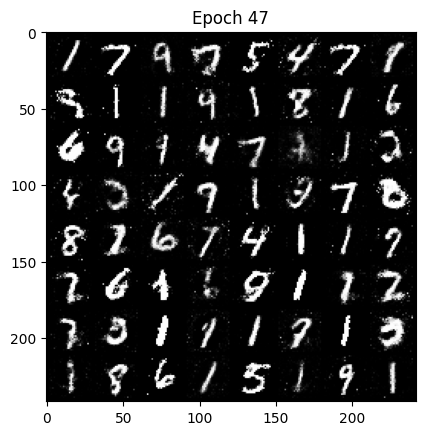

Epoch [48/50] Batch 0/938 Loss D: 0.6990, Loss G: 1.9839
Epoch [48/50] Batch 100/938 Loss D: 1.0654, Loss G: 1.8792
Epoch [48/50] Batch 200/938 Loss D: 0.9269, Loss G: 1.8439
Epoch [48/50] Batch 300/938 Loss D: 0.8729, Loss G: 2.0632
Epoch [48/50] Batch 400/938 Loss D: 1.0823, Loss G: 1.1978
Epoch [48/50] Batch 500/938 Loss D: 0.9361, Loss G: 2.1509
Epoch [48/50] Batch 600/938 Loss D: 0.5614, Loss G: 2.2262
Epoch [48/50] Batch 700/938 Loss D: 0.7619, Loss G: 1.2364
Epoch [48/50] Batch 800/938 Loss D: 1.1444, Loss G: 1.4131
Epoch [48/50] Batch 900/938 Loss D: 0.7694, Loss G: 1.7263


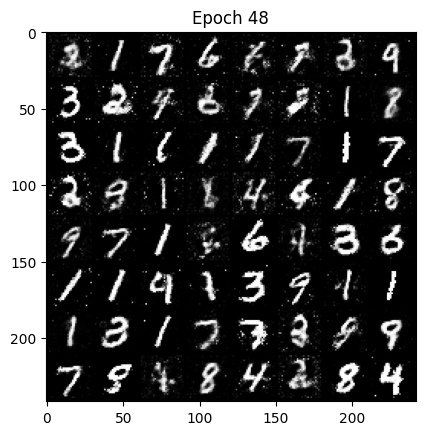

Epoch [49/50] Batch 0/938 Loss D: 0.6912, Loss G: 2.0467
Epoch [49/50] Batch 100/938 Loss D: 0.6091, Loss G: 2.1665
Epoch [49/50] Batch 200/938 Loss D: 0.6570, Loss G: 1.5423
Epoch [49/50] Batch 300/938 Loss D: 0.5798, Loss G: 1.9536
Epoch [49/50] Batch 400/938 Loss D: 0.8628, Loss G: 1.5107
Epoch [49/50] Batch 500/938 Loss D: 1.0215, Loss G: 1.9410
Epoch [49/50] Batch 600/938 Loss D: 0.7848, Loss G: 2.0811
Epoch [49/50] Batch 700/938 Loss D: 0.7655, Loss G: 1.5520
Epoch [49/50] Batch 800/938 Loss D: 0.7771, Loss G: 1.9811
Epoch [49/50] Batch 900/938 Loss D: 0.9961, Loss G: 2.1691


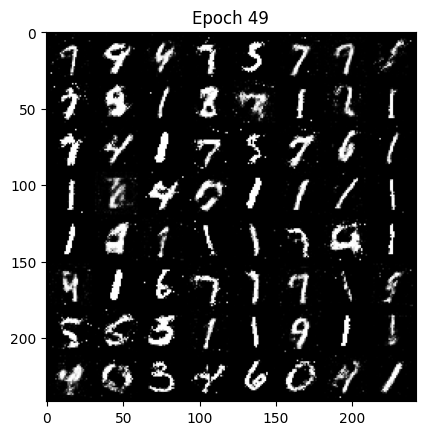

In [9]:
# Store loss values
d_losses = []
g_losses = []

# Number of batches to average epoch loss over
num_batches = len(dataloader)

for epoch in range(num_epochs):
    # Initialise loss variables to for computing epoch loss
    epoch_d_loss = 0
    epoch_g_loss = 0
    
    # Iterate the training dataset
    for batch_idx, (imgs, _) in enumerate(dataloader):
        # Load real images from the GPU
        real_imgs = imgs.reshape(imgs.size(0), img_channels*img_width*img_width).to(device) # Flatten and shift to device

        # Create labels for the real and fake images
        real_labels = torch.ones(imgs.size(0)).unsqueeze(1).to(device)
        fake_labels = torch.zeros(imgs.size(0)).unsqueeze(1).to(device)

        # ---------------------
        # First train the Discriminator
        # ---------------------
        # Calculate loss on real images
        d_out = disc(real_imgs)
        d_real_loss = criterion(d_out, real_labels)

        # Generate fake images with the generator and calculate the loss on these
        z = torch.randn(imgs.size(0), latent_dim).to(device)
        fake_imgs = gen(z)
        d_preds_on_fake = disc(fake_imgs)
        d_fake_loss = criterion(d_preds_on_fake, fake_labels)

        # Backprop for the Discriminator
        d_optimiser.zero_grad()
        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        d_optimiser.step()

        # ---------------------
        # Now train the Generator
        # ---------------------
        z = torch.randn(imgs.size(0), latent_dim).to(device)
        fake_imgs = gen(z)
        d_preds_on_fake = disc(fake_imgs)
        g_loss = criterion(d_preds_on_fake, real_labels)

        # Backptop for Generator
        g_optimiser.zero_grad()
        g_loss.backward()
        g_optimiser.step()

        # Accumulate losses
        epoch_d_loss += d_loss.item()
        epoch_g_loss += g_loss.item()

        # Print losses occasionally
        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(dataloader)} "
                  f"Loss D: {d_loss.item():.4f}, Loss G: {g_loss.item():.4f}")
    
    # At the end of the epoch, calculate the average loss during the epoch and store is for plotting later on
    d_losses.append(epoch_d_loss / num_batches)
    g_losses.append(epoch_g_loss / num_batches)

    # Save generated images for visualisation
    with torch.no_grad():
        z = torch.randn(64, latent_dim).to(device)
        generated_imgs = gen(z).view(-1, 1, 28, 28).cpu()
        grid_img = torchvision.utils.make_grid(generated_imgs, nrow=8, normalize=True)
        plt.imshow(grid_img.permute(1, 2, 0).numpy())
        plt.title(f"Epoch {epoch}")
        plt.show()

# Save models
torch.save(gen.state_dict(), "generator.pth")
torch.save(disc.state_dict(), "discriminator.pth")